In [1]:
#!/usr/bin/python
#import wradlib as wrl
import pylab as pl
from glob import glob
import warnings
warnings.filterwarnings('ignore')
try:
    get_ipython().magic("matplotlib inline")
except:
    pl.ion()
import numpy as np

import csv
import os
import datetime
import pandas as pd

#shapefile: GIS vector data format (ESRI)
import shapefile as shp  # Requires the pyshp package
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib import ticker
import netCDF4 as nc4
from datetime import date,timedelta
import plotly.graph_objs as go
import matplotlib.lines as mlines
import seaborn as sns

import importlib
import geopandas as gpd

#import external functions (need pip install ipynb)
import ipynb.fs.full.HaileventsFunctions as HF

In [2]:
#Folder address containing data:
fold = '/home/ciccuz/phd/KIT/hail_data/' #'/run/media/ciccuz/Seagate/phd_archive/KIT_backup_31Jan22/'
plt_fold = '/home/ciccuz/phd/KIT/scripts/plots/'

### - Selection of hailstorm of interest:

For hhmin: dont start from 0 because hhmin=0 is related to 00 UTC of the following day

In [3]:
#Select day, hours, lat, lon for the event:

"""
28-29 June 2006 (SW Germany - Austria)
"""
#day=2006179; year_u=2006; mon_u=6; day_u=28; hhmin=1; hhmax=24; lonmin=7; lonmax=17;latmin=44; latmax=49;
#day=2006180; year_u=2006; mon_u=6; day_u=29; hhmin=1; hhmax=22; lonmin=12; lonmax=19;latmin=44; latmax=49;

"""
23 July 2009 (Austria)
"""
#day=2009204; year_u=2009; mon_u=7; day_u=23; hhmin=8; hhmax=23; lonmin=8; lonmax=15;latmin=46.5; latmax=49; 

"""
28 July 2013 (Swabian Jura)
"""
#day=2013209; year_u=2013; mon_u=7; day_u=28; hhmin=8; hhmax=23; lonmin=7.5; lonmax=11;latmin=47.5; latmax=50; 

"""
6 August 2013 (Swabian Jura)
"""
#day=2013218; year_u=2013; mon_u=8; day_u=6; hhmin=10; hhmax=19; lonmin=7.5; lonmax=12;latmin=46; latmax=50; 

"""
5 September 2015 (Napoli - Campania)
"""
#day=2015248; year_u=2015; mon_u=9; day_u=5; hhmin=1; hhmax=23; lonmin=12; lonmax=16;latmin=40; latmax=42; 
#hhmin=7; hhmax=13





"""
24 June 2016 (Dettingen - S Germany)
"""
#day=2016176; year_u=2016; mon_u=6; day_u=24; hhmin=14; hhmax=23; lonmin=7; lonmax=11.5;latmin=46; latmax=50;
#fold_out = 'Dettingen_'+"{:02d}".format(day_u)+'-'+"{:02d}".format(mon_u)+'-'+str(year_u)

"""
29 July 2017 (Pontenure - Piacenza - Emilia Romagna)
"""
#day=2017210; year_u=2017; mon_u=7; day_u=29; hhmin=1; hhmax=23; lonmin=7; lonmax=12;latmin=44; latmax=47; 
#hhmin=21; hhmax=22
#fold_out = 'Piacenza_'+"{:02d}".format(day_u)+'-'+"{:02d}".format(mon_u)+'-'+str(year_u)

"""
18 August 2017 (Bohringer - South Germany)
"""
#day=2017230; year_u=2017; mon_u=8; day_u=18; hhmin=8; hhmax=23; lonmin=7; lonmax=11.5;latmin=46; latmax=50;

"""
4 June 2018 (Noceto - Parma - Emilia Romagna)
"""
#day=2018155; year_u=2018; mon_u=6; day_u=4; hhmin=1; hhmax=23; lonmin=9.5; lonmax=14;latmin=42.5; latmax=46.5
#lonmax=12;latmin=44.25
#hhmin=9; hhmax=16;
#fold_out = 'Parma_'+"{:02d}".format(day_u)+'-'+"{:02d}".format(mon_u)+'-'+str(year_u)

"""
29 October 2018 (Sardinia)
"""
#day=2018302; year_u=2018; mon_u=10; day_u=29; hhmin=1; hhmax=23; lonmin=7; lonmax=11;latmin=38; latmax=42
#hhmin=13; hhmax=14
#hhmin=5; hhmax=22
#fold_out = 'Sardinia_'+"{:02d}".format(day_u)+'-'+"{:02d}".format(mon_u)+'-'+str(year_u)






"""
10 July 2019 (Pescara - Abruzzo)
"""
#day=2019191; year_u=2019; mon_u=7; day_u=10; hhmin=8; hhmax=23; lonmin=13.5; lonmax=19;latmin=39; latmax=44;
#hhmin=10; hhmax=11

'\n10 July 2019 (Pescara - Abruzzo)\n'

#### - New hailstorms set for 2016-2018 over Italy:

In [4]:
"""
7 April 2016 (Condove - Torino)
"""
#day=2016098; year_u=2016; mon_u=4; day_u=7; hhmin=1; hhmax=23; lonmin=8.5; lonmax=10.5; latmin=44.5; latmax=47
#fold_out = 'Bergamo_'+"{:02d}".format(day_u)+'-'+"{:02d}".format(mon_u)+'-'+str(year_u)

"""
8 April 2016 (Condove - Torino)
"""
#day=2016099; year_u=2016; mon_u=4; day_u=8; hhmin=1; hhmax=23; lonmin=6.5; lonmax=9.5; latmin=43.5; latmax=46
#fold_out = 'Torino_'+"{:02d}".format(day_u)+'-'+"{:02d}".format(mon_u)+'-'+str(year_u)

"""
18 June 2016 (Asiago - Veneto)
"""
#day=2016170; year_u=2016; mon_u=6; day_u=18; hhmin=1; hhmax=23; lonmin=8.5; lonmax=13.5; latmin=44; latmax=47
#fold_out = 'Asiago_'+"{:02d}".format(day_u)+'-'+"{:02d}".format(mon_u)+'-'+str(year_u)

"""
5 August 2016 (Mondolfo (PU) - Marche)
"""
#day=2016218; year_u=2016; mon_u=8; day_u=5; hhmin=1; hhmax=23; lonmin=10.5; lonmax=15; latmin=42; latmax=45.5
#fold_out = 'PesaroUrbino_'+"{:02d}".format(day_u)+'-'+"{:02d}".format(mon_u)+'-'+str(year_u)

"""
16 August 2016 (Albenga - Savona)
"""
#day=2016229; year_u=2016; mon_u=8; day_u=16; hhmin=1; hhmax=23; lonmin=6.5; lonmax=10; latmin=43.5; latmax=45.5
#fold_out = 'Savona_'+"{:02d}".format(day_u)+'-'+"{:02d}".format(mon_u)+'-'+str(year_u)

"""
29 August 2016 (Torino + Graz)
"""
#day=2016242; year_u=2016; mon_u=8; day_u=29; hhmin=1; hhmax=23; lonmin=6; lonmax=17; latmin=44; latmax=49 #for Graz
#lonmin=6.5; lonmax=9; latmin=44; latmax=46     for Torino
#fold_out = 'Torino_'+"{:02d}".format(day_u)+'-'+"{:02d}".format(mon_u)+'-'+str(year_u)

"""
15 October 2016 (Casalbordino (Chieti) - Abruzzo)
"""
#day=2016289; year_u=2016; mon_u=10; day_u=15; hhmin=6; hhmax=11; lonmin=12; lonmax=16.5; latmin=40; latmax=44
#fold_out = 'Chieti_'+"{:02d}".format(day_u)+'-'+"{:02d}".format(mon_u)+'-'+str(year_u)

"""
4 May 2017 (Treviso - Veneto)
"""
#day=2017124; year_u=2017; mon_u=5; day_u=4; hhmin=1; hhmax=23; lonmin=8.5; lonmax=13.5; latmin=44; latmax=47
#fold_out = 'Treviso_'+"{:02d}".format(day_u)+'-'+"{:02d}".format(mon_u)+'-'+str(year_u)

"""
14 May 2017 (Veneto - Nord-est Italy)
"""
#day=2017134; year_u=2017; mon_u=5; day_u=14; hhmin=1; hhmax=23; lonmin=8.5; lonmax=13.5; latmin=44; latmax=47
#fold_out = 'Veneto_'+"{:02d}".format(day_u)+'-'+"{:02d}".format(mon_u)+'-'+str(year_u)

"""
25 June 2017 (Nord-est Italy)
"""
#day=2017176; year_u=2017; mon_u=6; day_u=25; hhmin=0; hhmax=23; lonmin=7.5; lonmax=13.5; latmin=44; latmax=47.5
#fold_out = 'NordEstIT_'+"{:02d}".format(day_u)+'-'+"{:02d}".format(mon_u)+'-'+str(year_u)

"""
27 June 2017 (Asti)
"""
#day=2017178; year_u=2017; mon_u=6; day_u=27; hhmin=1; hhmax=23; lonmin=6.5; lonmax=11; latmin=44; latmax=46.5
#fold_out = 'Asti_'+"{:02d}".format(day_u)+'-'+"{:02d}".format(mon_u)+'-'+str(year_u)

"""
28 June 2017 (Nord Italy)
"""
day=2017179; year_u=2017; mon_u=6; day_u=28; hhmin=0; hhmax=23; lonmin=8; lonmax=13; latmin=43.5; latmax=47.5
fold_out = 'NordIT_'+"{:02d}".format(day_u)+'-'+"{:02d}".format(mon_u)+'-'+str(year_u)

"""
9-10 August 2017 (Trentino Sudtirol)
"""
#day=2017221; year_u=2017; mon_u=8; day_u=9; hhmin=1; hhmax=23; lonmin=8; lonmax=13; latmin=44.5; latmax=48.5
#day=2017222; year_u=2017; mon_u=8; day_u=10; hhmin=1; hhmax=23; lonmin=6; lonmax=13; latmin=43.5; latmax=48.5

#fold_out = 'Trentino_'+"{:02d}".format(day_u)+'-'+"{:02d}".format(mon_u)+'-'+str(year_u)

"""
23 July 2018 (Turi - Bari)
"""
#day=2018204; year_u=2018; mon_u=7; day_u=23; hhmin=7; hhmax=17; lonmin=14; lonmax=19; latmin=39; latmax=43
#fold_out = 'Bari_'+"{:02d}".format(day_u)+'-'+"{:02d}".format(mon_u)+'-'+str(year_u)

"""
2 September 2018 (Pescara)
"""
#day=2018245; year_u=2018; mon_u=9; day_u=2; hhmin=1; hhmax=23; lonmin=12; lonmax=16; latmin=41; latmax=45
#hhmin=9; hhmax=20;
#fold_out = 'Pescara_'+"{:02d}".format(day_u)+'-'+"{:02d}".format(mon_u)+'-'+str(year_u)

"""
7 September 2018 (Carapelle/Orta Nova - Foggia)
"""
#day=2018250; year_u=2018; mon_u=9; day_u=7; hhmin=1; hhmax=23; lonmin=14; lonmax=19; latmin=39; latmax=43
#hhmin=9; hhmax=20;
#fold_out = 'Foggia_'+"{:02d}".format(day_u)+'-'+"{:02d}".format(mon_u)+'-'+str(year_u)

"""
7 October 2018 (Melpignano - Lecce)
"""
#day=2018280; year_u=2018; mon_u=10; day_u=7; hhmin=1; hhmax=23; lonmin=14; lonmax=19; latmin=38; latmax=43
#fold_out = 'Lecce_'+str(day_u)+'-'+str(mon_u)+'-'+str(year_u)


'\n7 October 2018 (Melpignano - Lecce)\n'

In [5]:
fold_out

'NordIT_28-06-2017'

### - Initialization parameters: spatial domain

In [6]:
# must run the bash command: sshfs -p22 giordano@imk-tss-risk:/hail4/punge/ ./hail4_punge/

#Read the shapefiles: OLD VERSION
"""
sf_it = shp.Reader(fold + "hail4_punge/geodata/ITA_adm/ITA_adm0.shp", encoding='latin-1'); srn=5;
sf_de = shp.Reader(fold + "hail4_punge/geodata/DEU_adm/DEU_adm0.shp", encoding='latin-1'); srn=5;
sf_aut = shp.Reader(fold + "hail4_punge/geodata/AUT_adm/AUT_adm0.shp", encoding='latin-1'); srn=5;
sf_che = shp.Reader(fold + "hail4_punge/geodata/CHE_adm/CHE_adm0.shp", encoding='latin-1'); srn=5;
sf_cro = shp.Reader(fold + "hail4_punge/geodata/Croatia/mj788hg8036.shp", encoding='latin-1'); srn=5;
sf_slo = shp.Reader(fold + "hail4_punge/geodata/Slovenia/gk259nt7452.shp", encoding='latin-1'); srn=5;
sf_hun = shp.Reader(fold + "hail4_punge/geodata/Hungary/qh513vs8921.shp", encoding='latin-1'); srn=5;
"""

#With geopandas: NEW VERSION!
sfg_ita = gpd.read_file(fold + "hail4_punge/geodata/ITA_adm/ITA_adm0.shp", encoding='latin-1')
sfg_deu = gpd.read_file(fold + "hail4_punge/geodata/DEU_adm/DEU_adm0.shp", encoding='latin-1')
sfg_aut = gpd.read_file(fold + "hail4_punge/geodata/AUT_adm/AUT_adm0.shp", encoding='latin-1')
sfg_che = gpd.read_file(fold + "hail4_punge/geodata/CHE_adm/CHE_adm0.shp", encoding='latin-1')
sfg_cro = gpd.read_file(fold + "hail4_punge/geodata/Croatia/mj788hg8036.shp", encoding='latin-1')
sfg_slo = gpd.read_file(fold + "hail4_punge/geodata/Slovenia/gk259nt7452.shp", encoding='latin-1')
sfg_hun = gpd.read_file(fold + "hail4_punge/geodata/Hungary/qh513vs8921.shp", encoding='latin-1')

latplot=[latmin,latmax]; lonplot=[lonmin,lonmax]; dxstr=.1

#maps limits
x_lim=lonplot
y_lim=latplot

#lat/lon coords to cover the whole SPHERA domain:
lonmin_S=6; lonmax_S=19; latmin_S=35; latmax_S=49
latplot_S=[latmin_S,latmax_S]; lonplot_S=[lonmin_S,lonmax_S]
#maps limits whole SPHERA domain
x_lim_S=lonplot_S
y_lim_S=latplot_S

#OT detections original dataset spatial domain:
lonmin_OT_or=-10; lonmax_OT_or=30; latmin_OT_or=30; latmax_OT_or=65
latplot_OT_or=[latmin_OT_or,latmax_OT_or]; lonplot_OT_or=[lonmin_OT_or,lonmax_OT_or]
#maps limits whole OT domain
x_lim_OT_or=lonplot_OT_or
y_lim_OT_or=latplot_OT_or


#shapefile in vector form for considering multiple geographic shapefiles
sf_geo = [sfg_ita, sfg_aut]  #[sf_it] [sfg_it, sfg_aut] 

In [7]:
#Read and store cities and their features to be used in the maps:
clonsel, clatsel, csizesel, cnamesel, ckindsel = HF.HF_cities(latmin,latmax,lonmin,lonmax)

#The same but considering the whole SPHERA domain
clonsel_S, clatsel_S, csizesel_S, cnamesel_S, ckindsel_S = HF.HF_cities(latmin_S,latmax_S,lonmin_S,lonmax_S)

### - Read datasets:
- ESWD hail report
- UNIPOL insurance claims
- EUCLID punctual lightning data
- LAMPINET gridded (10km) lightning data/ LJ index
- OT data

In [8]:
#Read ESWD hail report data: store lat, lon, hail size and datetime, and retain only data in the selected area/time
if (year_u >= 1995) & (year_u <= 2020):

    #df_eswd = pd.read_csv('/home/bg2896/hail4_giordani/hail_obs/Insurance_ESSL_Italy_data/original_ungridded_data/ESSL/9313218694_v1_6_Giordani_LargeHail_Italy_1995-01-01_2020-12-31_data.csv')
    df_eswd = pd.read_csv(fold + 'hail4_punge/ESWD/ESWD_HAIL_19790101-20200531_v1_6.csv')   #Swabian Jura 2013
    
    #selection on the zoomed domain of the event
    eswd_ev_sel = HF.HF_eswd_df(df_eswd,year_u,mon_u,day_u,hhmin,hhmax,latmin,latmax,lonmin,lonmax)
    #selection over the whole SPHERA domain
    eswd_ev_sel_S = HF.HF_eswd_df(df_eswd,year_u,mon_u,day_u,hhmin,hhmax,latmin_S,latmax_S,lonmin_S,lonmax_S)

else:
    eswd_ev_sel = pd.DataFrame()
    eswd_ev_sel_S = pd.DataFrame()

eswd_ev_sel

,datetime,lat,lon,size,QC_level
0,2017-06-28 10:17:00,45.879,9.990,2.0,QC1
1,2017-06-28 10:20:00,45.892,10.011,2.0,QC1
2,2017-06-28 10:30:00,45.867,9.995,2.0,QC1
3,2017-06-28 11:30:00,45.084,10.793,5.0,QC1
4,2017-06-28 12:15:00,45.713,11.696,6.6,QC1
5,2017-06-28 12:25:00,45.717,9.579,2.0,QC1
6,2017-06-28 12:35:00,45.744,11.788,4.0,QC1
7,2017-06-28 12:38:00,45.779,11.806,4.0,QC1
8,2017-06-28 12:40:00,45.780,11.837,5.0,QC1
9,2017-06-28 14:25:00,44.222,11.775,2.0,QC1


In [9]:
eswd_ev_sel_S

,datetime,lat,lon,size,QC_level
0,2017-06-28 10:17:00,45.879,9.990,2.0,QC1
1,2017-06-28 10:20:00,45.892,10.011,2.0,QC1
2,2017-06-28 10:30:00,45.867,9.995,2.0,QC1
3,2017-06-28 11:30:00,45.084,10.793,5.0,QC1
4,2017-06-28 12:00:00,44.800,7.822,NaN,QC1
5,2017-06-28 12:15:00,45.713,11.696,6.6,QC1
6,2017-06-28 12:20:00,46.393,15.574,4.0,QC1
7,2017-06-28 12:25:00,45.717,9.579,2.0,QC1
8,2017-06-28 12:35:00,45.744,11.788,4.0,QC1
9,2017-06-28 12:38:00,45.779,11.806,4.0,QC1


In [10]:
#Read UNIPOL insurance claims for hail events:
if (year_u >= 2017) & (year_u <= 2020):
   
    df_unipol = pd.read_csv(fold + 'data/ESWD_insurance/Insurance_ESSL_Italy_data/original_ungridded_data/UNIPOL/Estrazione_SINISTRI_GRANDINE_E_VENTO_ITALIA_DateLatLon.csv')
    
    #selection on the zoomed domain of the event
    u_ev_sel = HF.HF_unipol_df(df_unipol,year_u,mon_u,day_u,hhmin,hhmax,latmin,latmax,lonmin,lonmax)

    #selection over the whole SPHERA domain
    u_ev_sel_S = HF.HF_unipol_df(df_unipol,year_u,mon_u,day_u,hhmin,hhmax,latmin_S,latmax_S,lonmin_S,lonmax_S)

else:
    u_ev_sel = pd.DataFrame()
    u_ev_sel_S = pd.DataFrame()

u_ev_sel

,datetime,lon,lat
0,2017-06-28 00:00:00,12.229625,46.002842
1,2017-06-28 00:01:00,8.967789,45.106861
2,2017-06-28 09:00:00,12.317139,44.254105
3,2017-06-28 10:00:00,12.317139,44.254105
4,2017-06-28 13:00:00,10.745914,45.006977
5,2017-06-28 13:00:00,10.745914,45.006977
6,2017-06-28 13:00:00,10.745914,45.006977
7,2017-06-28 13:00:00,10.814687,45.110035
8,2017-06-28 13:15:00,10.814687,45.110035
9,2017-06-28 13:30:00,10.745914,45.006977


#### Commented code for EUCLID and LAMPINET data

#Read lightning EUCLID data (filtered (what means??): date,hour,lat,lon,intensity? measured how?)

#first access: read date and hour, create datetime column and order by datetime, then save new file csv
#df_lg = pd.read_csv('/home/bg2896/hail4_giordani/lightningss/BLIDS-Data_Filtered/BlidsData_2019_CG_10kA.csv', sep=';')
#df_lg.columns = ["date","hour","lon","lat","1","kA","NA"]

#df_lg['datetime'] = pd.to_datetime(df_lg['date'] + ' ' + df_lg['hour'])
#df_lg = df_lg.drop(['date', 'hour'], axis=1)
#df_lg = df_lg.sort_values(by='datetime').reset_index(drop=True)
#df_lg.to_csv(path_or_buf='/home/bg2896/hail4_giordani/events/lightning_BLIDS/BlidsData_2019_CG_10kA_ordered.csv',index=False)

#from second access:

#probably must run the bash command: 

#sshfs -p22 giordano@imk-tss-risk:/hail4/giordano/events/lightning_BLIDS/ ./hail4_giordani/events/lightning_BLIDS/

if (year_u >= 2001) & (year_u <= 2020):
    
    df_lg = pd.read_csv(fold + f'data/lightning_BLIDS/BlidsData_{year_u}_CG_10kA_ordered.csv')
    df_lg_sel = HF.HF_euclid_df(df_lg,year_u,mon_u,day_u,hhmin,hhmax,latmin,latmax,lonmin,lonmax)

else:
    df_lg_sel = pd.DataFrame()
    
df_lg_sel

df_lg_sel = pd.DataFrame()

#Read LAMPINET shapefile:
sf_lamp_10 = shp.Reader(fold + "data/lampinet/mask/grid_10.shp", encoding='latin-1'); srn=5;

#parameter for the minimum number of lightning per day necessary to retain a LAMPINET box:
Nlig_min=5

#lampinet daily sum of lightnings in the 10km grid, by filtering out boxes with less than Nlig_min lightning/day
if (year_u >= 2016) & (year_u <= 2018):
    
    df_lamp_daysum_filt = HF.HF_Lampinet_raw(year_u, mon_u, day_u, Nlig_min)

else:
    df_lamp_daysum_filt = pd.DataFrame()
    
df_lamp_daysum_filt

In [11]:
#Read LAMPINET LJ index

- Index =0 o 1: probably 1 when a certain threshold of number of lightnings in a certain time to define a LJ is exceeded, 0 otherwise (MUST ASK VALENTINA!!)

- Index must divided into different days to be used! Ask Valentina also about temporal resolution/"commitment" of the index??

- LJ index is hourly-based and <span style="color:red">ONLY ON GRID OF 20 KM!!!</span>

#Read LAMPINET LJ shapefile (20 km for now!):
sf_lamp_20 = shp.Reader(fold + "data/lampinet/mask/grid_5.shp", encoding='latin-1'); srn=5;

#Lampinet LJ index for specific hour of the day lj_hour

if (year_u >= 2015) & (year_u <= 2020):
    lj_hour=20

    df_lamp_sel = HF.HF_Lampinet_LJhourly(year_u, mon_u, day_u, lj_hour)
    df_lamp_sel

    #count number of cells where LJ index=1
    sum(1 for i in df_lamp_sel.index if df_lamp_sel.ind[i] == 1)
else:
    df_lamp_sel = pd.DataFrame()

In [12]:
"""
Read OT data
"""

#SETUP OT parameters:

#otpref='NASALARC_MET08_SEVIRI_OTDETECTION_'
#otpref='NASALARC_MET09_SEVIRI_OTDETECTION_'
otpref='NASALARC_MET10_SEVIRI_OTDETECTION_'
#otpref='NASALARC_MET11_SEVIRI_OTDETECTION_'
#otpref='A'
otsep='_' #'.' 
othstart = "0000" #"1004"

cpclat, cpclon, otpmax, dtmin, ot_timing = HF.HF_OTdata(day,hhmin,hhmax,otpref,otsep,othstart)

# - Plot data:

In [13]:
"""
Parameters for plots:
"""

#timerange for hail events (eswd/insurance) color-coding and colorbar: every TOT minutes/hours
eswd_trange = '60min' #'H' #'30min'

df_lg_trange = '30min'

## - Daily-aggregated analysis

#### - Sum of LAMPINET lightning strikes over the day

if len(df_lamp_daysum_filt) > 0:
    
    HF.HF_LAMPINET_plot(sf_lamp_10, sf_geo, x_lim, y_lim, df_lamp_daysum_filt, u_ev_sel, eswd_ev_sel, eswd_trange, 
                        clonsel, clatsel, cnamesel, LJ=False, ESWD=True)
    
    #pl.savefig(plt_fold + f"Events_Italy_2016-2018/{fold_out}/daily_NLampinet.png", dpi=300, bbox_inches='tight')

### - OT max probability + EUCLID + ESWD/UNIPOL + LAMPINET daily
OT detections considered in the range >= hhmin and < hhmax (to not include also hour in hhmax but only before hhmax!)

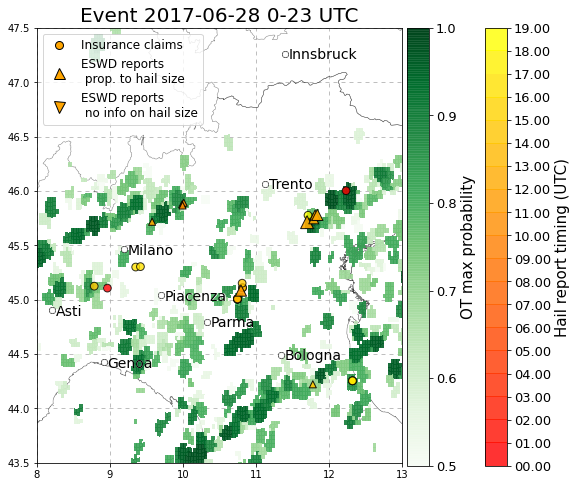

In [14]:
#plot with also lightning data
#HF.HF_OTmax_plot_wLightning(ds, sf_lamp_10, sf_geo, x_lim, y_lim, df_lamp_daysum_filt, cpclon, cpclat, otpmax,
#                            df_lg_sel, df_lg_trange, u_ev_sel, eswd_ev_sel, eswd_trange, clonsel, clatsel, cnamesel, 
#                            LJ=False, LAMPINET=False, OT=True, EUCLID=False, ESWD=True)

#plot with OT + hail reports only:
HF.HF_OTmax_plot(day, sf_geo, x_lim, y_lim, cpclon, cpclat, otpmax, u_ev_sel, eswd_ev_sel, eswd_trange, hhmin, hhmax, 
                 clonsel, clatsel, cnamesel, OT=True, ESWD=True)

pl.savefig(plt_fold + f"Events_Italy_2016-2018/{fold_out}/OT/{hhmin}-{hhmax}_OTmax_Torino.png",dpi=200, bbox_inches='tight')

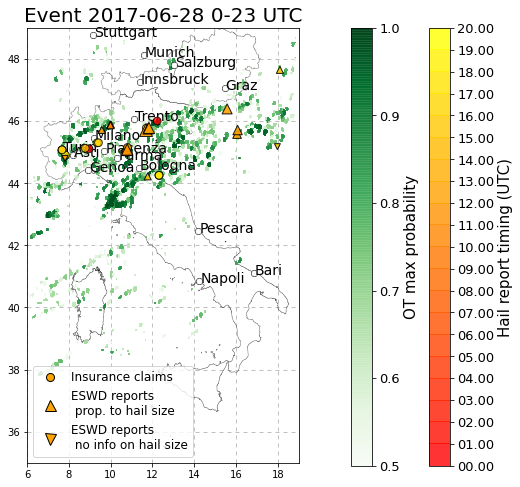

In [15]:
HF.HF_OTmax_plot(day, sf_geo, x_lim_S, y_lim_S, cpclon, cpclat, otpmax, u_ev_sel_S, eswd_ev_sel_S, eswd_trange, 
                 hhmin, hhmax, clonsel_S, clatsel_S, cnamesel_S, OT=True, ESWD=True)

pl.savefig(plt_fold + f"Events_Italy_2016-2018/{fold_out}/OT/{hhmin}-{hhmax}_OTmax_S.png",dpi=200, bbox_inches='tight')

### - For loop on hours of the day for plotting hourly OT detections:

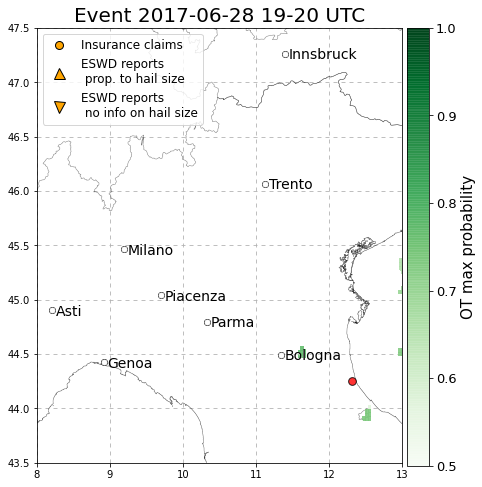

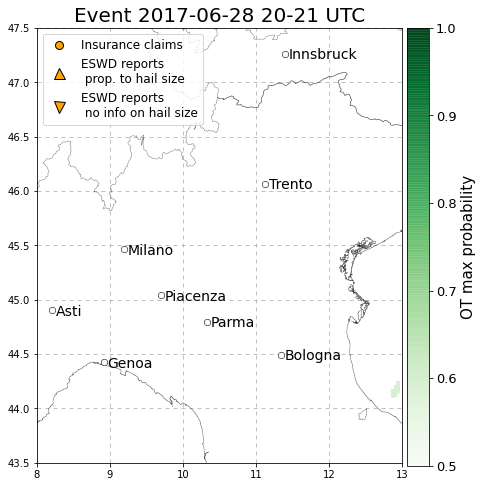

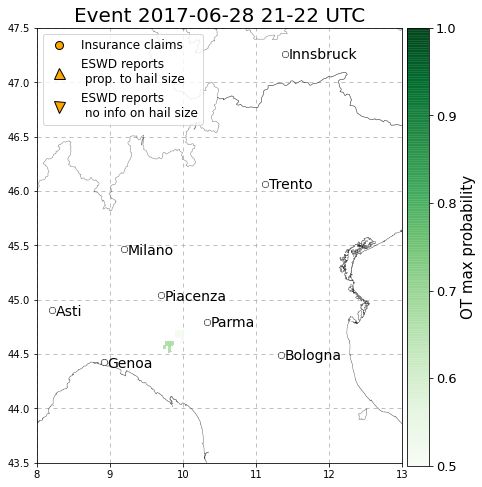

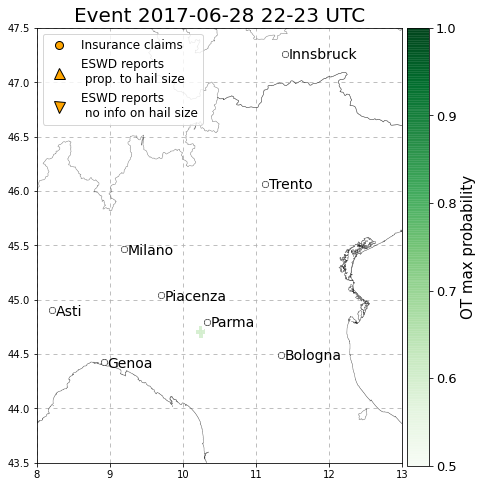

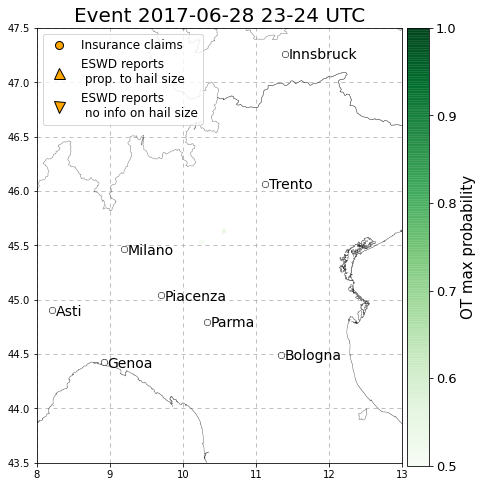

In [21]:
hmin=19
hmax=23

for hh in np.arange(hmin, hmax+1, 1):
    
    hhmin=hh
    hhmax=hh+1
    
    eswd_ev_sel = HF.HF_eswd_df(df_eswd,year_u,mon_u,day_u,hhmin,hhmax,latmin,latmax,lonmin,lonmax)
    u_ev_sel = HF.HF_unipol_df(df_unipol,year_u,mon_u,day_u,hhmin,hhmax,latmin,latmax,lonmin,lonmax)
    cpclat, cpclon, otpmax, dtmin = HF.HF_OTdata(day,hhmin,hhmax,otpref,otsep,othstart)
    
    HF.HF_OTmax_plot(day, sf_geo, x_lim, y_lim, cpclon, cpclat, otpmax, u_ev_sel, eswd_ev_sel, eswd_trange, hhmin, hhmax, 
                 clonsel, clatsel, cnamesel, OT=True, ESWD=True)

    pl.savefig(plt_fold + f"Events_Italy_2016-2018/{fold_out}/OT/{hhmin}-{hhmax}_OTmax_Torino.png",dpi=200, bbox_inches='tight')
    

#### - OT Dtemp:  MINIMUM infrared brightness (cloud top) - tropopause temperature (dtmin) + ESWD/UNIPOL

In [16]:
df_lg_sel = pd.DataFrame()

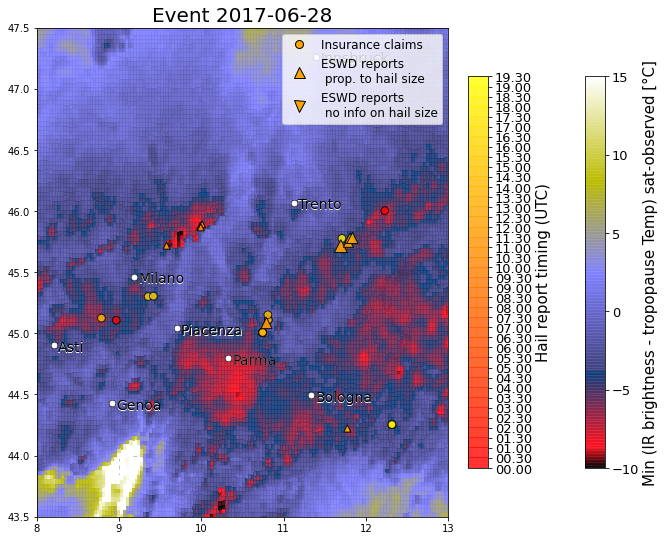

In [17]:
HF.HF_DTmin_plot(day, sf_geo, x_lim, y_lim, cpclon, cpclat, dtmin, df_lg_sel, df_lg_trange, u_ev_sel, eswd_ev_sel, 
                 eswd_trange, clonsel, clatsel,cnamesel, OT=True, EUCLID=False, ESWD=True)

pl.savefig(plt_fold + f"Events_Italy_2016-2018/{fold_out}/OT/{hhmin}-{hhmax}_OTdTmin.png",dpi=200, bbox_inches='tight')

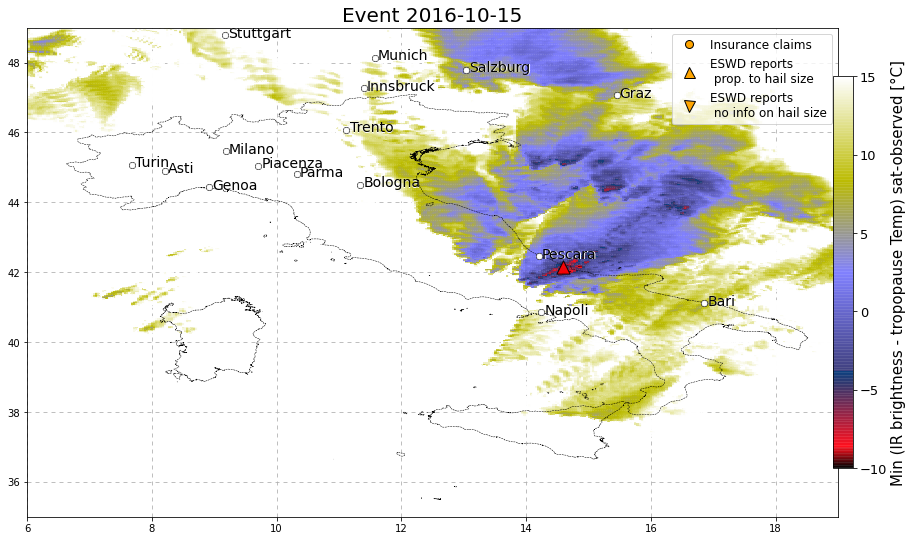

In [117]:
HF.HF_DTmin_plot(day, sf_geo, x_lim_S, y_lim_S, cpclon, cpclat, dtmin, df_lg_sel, df_lg_trange, u_ev_sel_S, 
                 eswd_ev_sel_S, eswd_trange, clonsel_S, clatsel_S,cnamesel_S, OT=True, EUCLID=False, ESWD=True)

pl.savefig(plt_fold + f"Events_Italy_2016-2018/{fold_out}/OT/{hhmin}-{hhmax}_OTdTmin_S.png",dpi=200, bbox_inches='tight')

### - LAMPINET LJ index 

LJ index "documentation" (still qualitative analysis performed, must be redone!):
- 20 km grid
- LJ defined in 15 min interval when there is at least 1 initial strike and >=20 strikes in the next 15 minutes
- Data aggregated hourly: the LJ value is attributed to the last instant of the hour in question (i.e. a LJ issued at 17 means that it covers the minutes 17:00 to 17:59)
- <span style="color:red"> Some red text </span>

In [ ]:
#plot LJ maximum over the day:

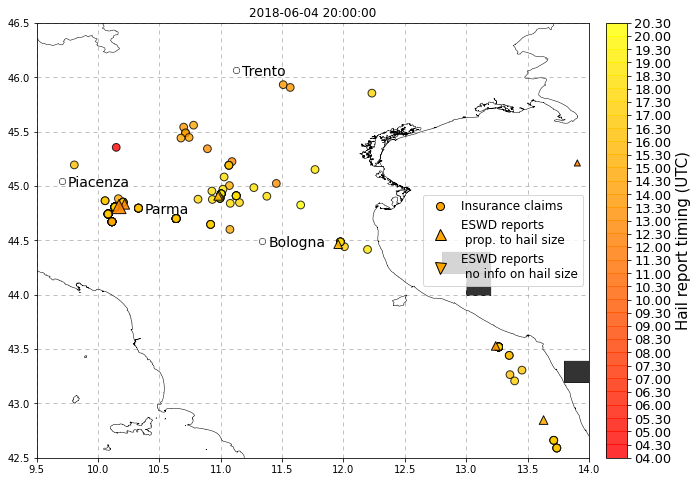

In [17]:
#plot LJ for lj_hour of the day
if len(df_lamp_sel) > 0:
    
    HF.HF_LAMPINET_plot(sf_lamp_20, sf_geo, x_lim, y_lim, df_lamp_sel, u_ev_sel, eswd_ev_sel, eswd_trange, 
                        clonsel, clatsel, cnamesel, LJ=True, ESWD=True)

In [ ]:
#loop over the hours of the event:
for lj_hour in np.arange(hhmin, hhmax+1, 1):
    
    df_lamp_sel = HF.HF_Lampinet_LJhourly(year_u, mon_u, day_u, lj_hour)
    
    HF.HF_LAMPINET_plot(sf_lamp_20, sf_geo, x_lim, y_lim, df_lamp_sel, u_ev_sel, eswd_ev_sel, eswd_trange, 
                        clonsel, clatsel, cnamesel, LJ=True, ESWD=True)
    
    pl.savefig(plt_fold + f"Events_Italy_2016-2018/{fold_out}/LJ_ind_10Aug/{lj_hour}_LJ.png",dpi=200,bbox_inches='tight')

### - SPHERA reanalysis convective proxies

For the moment on a 20km or 10km grid: LI, Kindex, AvvGeop500hPa, %VV700hPa,DLS, HZEROCL and CAPE_MU or CAPE_ML

In [22]:
#Read SPHERA data and couple box number to coordinate locations:

#decide sphera box resolution:
sp_res = 10 #20

#Read the shapefiles:  depending on grid 20km or 10km
if sp_res == 10:
    sf_sp = gpd.read_file(fold + "data/lampinet/mask/grid_10_49N.shp", encoding='latin-1')
            #OLD VERSION shp.Reader(fold + "data/lampinet/mask/grid_10_49N.shp", encoding='latin-1'); srn=5;
    
elif sp_res == 20:
    sf_sp = gpd.read_file(fold + "data/lampinet/mask/grid_5.shp", encoding='latin-1')

In [23]:
#at the moment: 10km data extends to 49°N (so southern germany included) while 20km data do not (around 48°N)
#every file is related to one HOUR, data for every box every hour 
#         -> tot: (20km grid) 4225 boxes, (10km grid) 16900 boxes  (18150 ??)

# in the read cut out all values > 3..e38 (in common for all parameters in the same box, so probably due to some
#error/missing data in the caluclation of the index in that box) -> actually for e.g. H0 when this value means that
#all
if (year_u >= 2016) & (year_u <= 2018):
   
    df_sp = HF.HF_reanProxies_read(year_u, mon_u, day_u, sp_res)
    
    #FIX BOX_ID INDEX: make it start from 0 and not 1 otherwise all grid cells are shifted to the left of 1!
    df_sp.box_id = df_sp.box_id - 1 
    
else:
    df_sp = pd.DataFrame()

df_sp

,datetime,box_id,%VV700,AvvGeop500,Kindex,LI,DLS,H0,CAPE_MU,CAPE_ML
0,2017-06-28 00:00:00,0,100.000000,-81.698654,25.415745,-0.345913,15.557834,4618.25635,57.799999,19.668751
1,2017-06-28 00:00:00,1,100.000000,-78.200127,25.346617,-0.404936,14.559805,4604.65234,50.440216,24.467392
2,2017-06-28 00:00:00,2,59.090908,-64.390999,25.326166,-0.194985,12.504073,4606.00586,38.630680,27.562500
3,2017-06-28 00:00:00,3,40.000000,-71.983170,25.136591,-0.009439,9.906788,4610.11865,41.137501,28.312500
4,2017-06-28 00:00:00,4,15.000000,-21.196507,25.357082,0.075913,10.620314,4608.29980,44.312500,23.006250
...,...,...,...,...,...,...,...,...,...,...
435595,2017-06-28 23:00:00,18145,100.000000,0.000000,33.451374,2.766441,9.248294,3464.12500,22.750000,0.000000
435596,2017-06-28 23:00:00,18146,100.000000,0.000000,33.219116,2.753664,9.402685,3505.93750,30.156250,0.000000
435597,2017-06-28 23:00:00,18147,66.666664,0.000000,32.903870,2.558596,9.387381,3579.54175,31.291666,0.000000
435598,2017-06-28 23:00:00,18148,100.000000,0.000000,32.669434,2.403973,9.429870,3639.91675,38.291668,0.000000


##### - Plot parameters aggregated over the day: 

In [24]:
#aggregate parameters by avg, min, or max (other could be considered maybe?)
df_sp_dayAvg = df_sp.groupby(['box_id'], as_index=False).mean()
df_sp_dayMax = df_sp.groupby(['box_id'], as_index=False).max().drop(columns=['datetime'])
df_sp_dayMin = df_sp.groupby(['box_id'], as_index=False).min().drop(columns=['datetime'])

In [25]:
df_sp_dayMax

,box_id,%VV700,AvvGeop500,Kindex,LI,DLS,H0,CAPE_MU,CAPE_ML
0,0,100.000000,71.669678,26.625650,6.878199,20.691235,4663.21240,82.306252,33.468750
1,1,100.000000,99.870979,27.071798,7.811227,20.094463,4674.23389,109.630432,36.304348
2,2,63.636364,96.534065,26.785261,7.596858,17.460436,4708.99414,154.721588,34.375000
3,3,70.000000,61.849232,27.293182,7.308814,15.846970,4686.51270,171.481247,40.075001
4,4,65.000000,236.864548,26.395517,8.082228,17.761435,4713.79980,134.462494,31.150000
...,...,...,...,...,...,...,...,...,...
18110,18145,100.000000,0.000000,36.948101,3.133111,15.478101,3837.16675,791.333313,542.375000
18111,18146,100.000000,0.000000,37.426697,3.373101,15.286010,3843.06250,869.437500,566.343750
18112,18147,66.666664,0.000000,37.856586,3.355442,14.924399,3876.95825,963.833313,623.958313
18113,18148,100.000000,0.000000,38.349152,3.321750,14.631026,3907.33325,1076.791630,778.125000


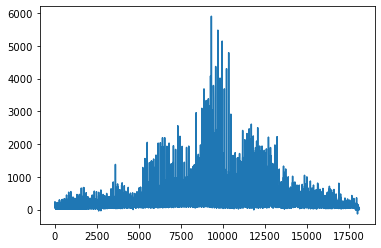

In [26]:
plt.plot(df_sp_dayMax.index, df_sp_dayMax.AvvGeop500)

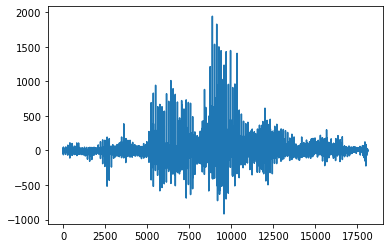

In [27]:
plt.plot(df_sp_dayMax.index, df_sp_dayAvg.AvvGeop500)

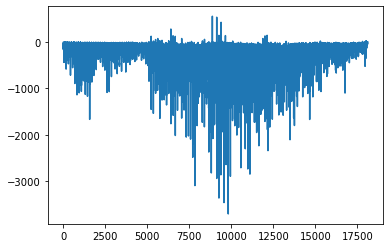

In [28]:
plt.plot(df_sp_dayMax.index, df_sp_dayMin.AvvGeop500)

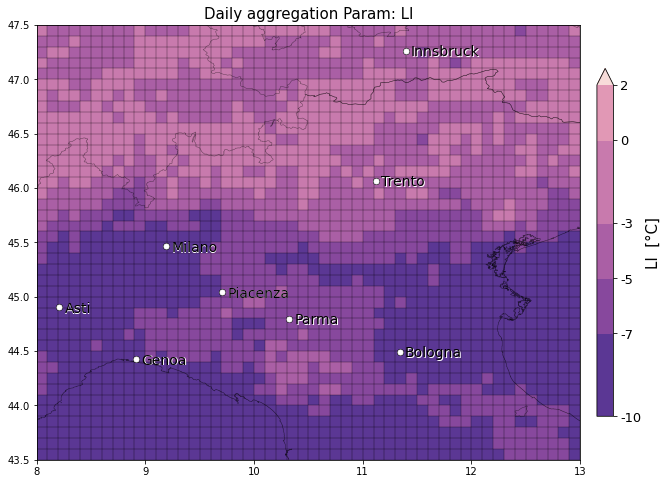

In [29]:
#MINIMUM of LI
sp_par = 'LI'
sp_hour = 0
HF.HF_reanProxies_plot(sf_geo, sf_sp, x_lim, y_lim, df_sp_dayMin, sp_hour, sp_par, clonsel, clatsel, cnamesel, 
                       hourly=False)

pl.savefig(plt_fold + f"Events_Italy_2016-2018/{fold_out}/sphera_proxies/DailyMIN_{sp_par}_{sp_res}km.png",dpi=200,
           bbox_inches='tight')

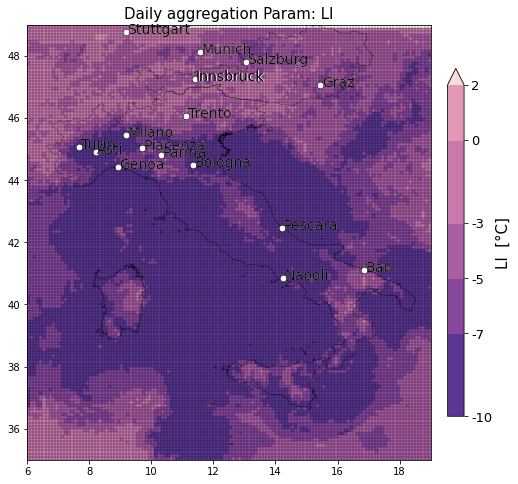

In [30]:
HF.HF_reanProxies_plot(sf_geo, sf_sp, x_lim_S, y_lim_S, df_sp_dayMin, sp_hour, sp_par, clonsel_S, clatsel_S, cnamesel_S, 
                       hourly=False)

pl.savefig(plt_fold + f"Events_Italy_2016-2018/{fold_out}/sphera_proxies/DailyMIN_{sp_par}_{sp_res}km_S.png",dpi=200,
           bbox_inches='tight')

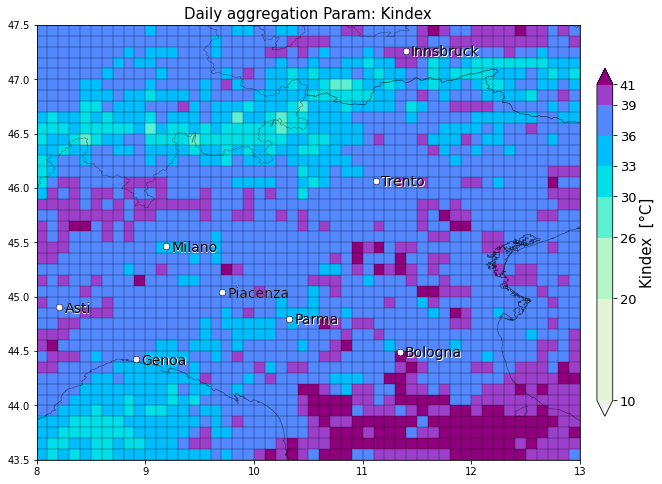

In [31]:
#MAXIMUM of Kindex
sp_par = 'Kindex'
sp_hour = 0
HF.HF_reanProxies_plot(sf_geo, sf_sp, x_lim, y_lim, df_sp_dayMax, sp_hour, sp_par, clonsel, clatsel, cnamesel, 
                       hourly=False)

pl.savefig(plt_fold + f"Events_Italy_2016-2018/{fold_out}/sphera_proxies/DailyMAX_{sp_par}_{sp_res}km.png",dpi=200,
           bbox_inches='tight')

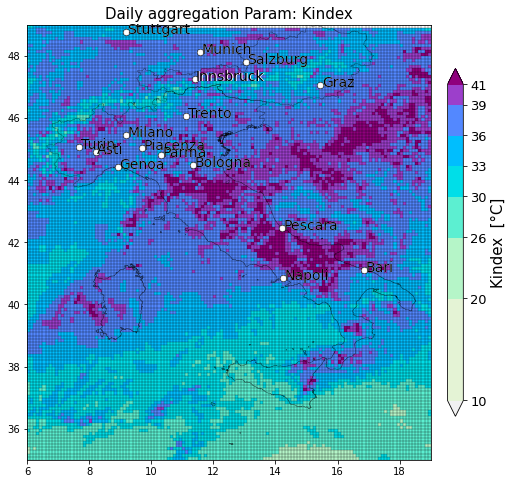

In [32]:
HF.HF_reanProxies_plot(sf_geo, sf_sp, x_lim_S, y_lim_S, df_sp_dayMax, sp_hour, sp_par, clonsel_S, clatsel_S, cnamesel_S, 
                       hourly=False)

pl.savefig(plt_fold + f"Events_Italy_2016-2018/{fold_out}/sphera_proxies/DailyMAX_{sp_par}_{sp_res}km_S.png",dpi=200,
           bbox_inches='tight')

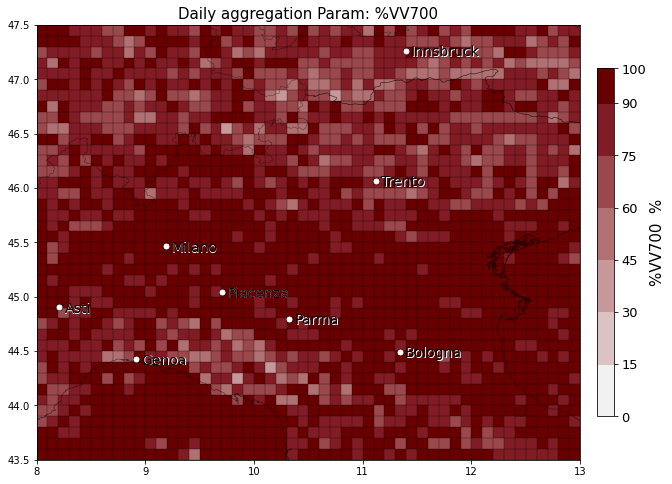

In [33]:
#MAXIMUM of %VV700
sp_par = '%VV700'
sp_hour = 0
HF.HF_reanProxies_plot(sf_geo, sf_sp, x_lim, y_lim, df_sp_dayMax, sp_hour, sp_par, clonsel, clatsel, cnamesel, 
                       hourly=False)

pl.savefig(plt_fold + f"Events_Italy_2016-2018/{fold_out}/sphera_proxies/DailyMAX_{sp_par}_{sp_res}km.png",dpi=200,
           bbox_inches='tight')

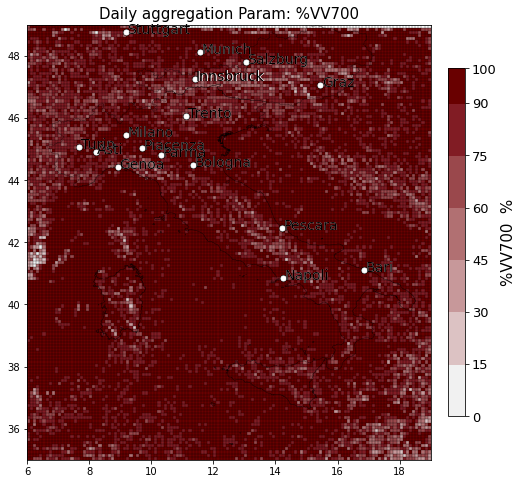

In [34]:
HF.HF_reanProxies_plot(sf_geo, sf_sp, x_lim_S, y_lim_S, df_sp_dayMax, sp_hour, sp_par, clonsel_S, clatsel_S, cnamesel_S, 
                       hourly=False)

pl.savefig(plt_fold + f"Events_Italy_2016-2018/{fold_out}/sphera_proxies/DailyMAX_{sp_par}_{sp_res}km_S.png",dpi=200,
           bbox_inches='tight')

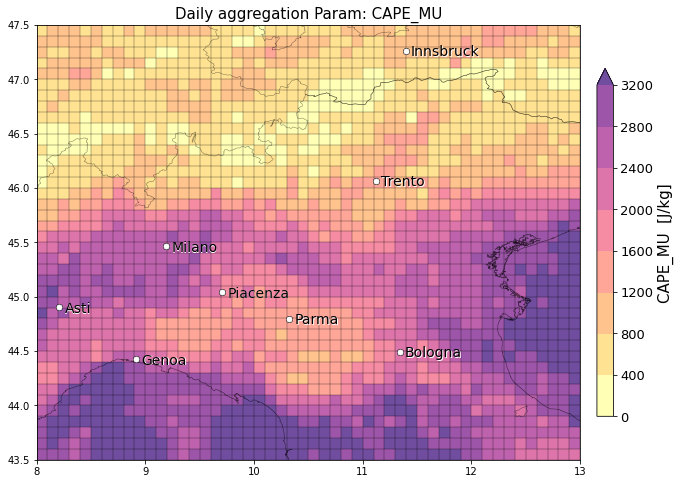

In [35]:
#MAXIMUM of CAPE_MU
sp_par = 'CAPE_MU' #'CAPE_ML'
sp_hour = 0
HF.HF_reanProxies_plot(sf_geo, sf_sp, x_lim, y_lim, df_sp_dayMax, sp_hour, sp_par, clonsel, clatsel, cnamesel, 
                       hourly=False)

#pl.savefig(plt_fold + f"Events_Italy_2016-2018/{fold_out}/sphera_proxies/DailyMAX_{sp_par}_{sp_res}km.png",dpi=200,
#           bbox_inches='tight')

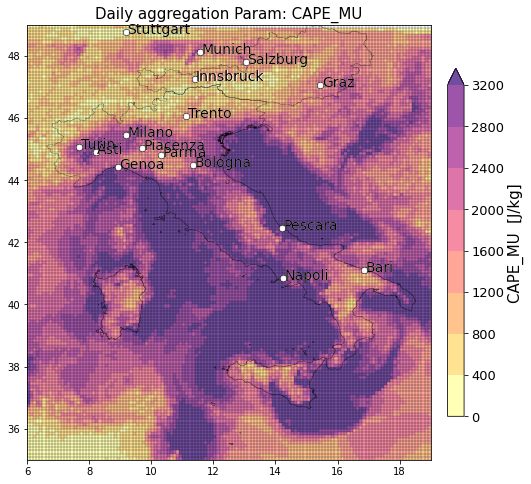

In [36]:
HF.HF_reanProxies_plot(sf_geo, sf_sp, x_lim_S, y_lim_S, df_sp_dayMax, sp_hour, sp_par, clonsel_S, clatsel_S, cnamesel_S, 
                       hourly=False)

pl.savefig(plt_fold + f"Events_Italy_2016-2018/{fold_out}/sphera_proxies/DailyMAX_{sp_par}_{sp_res}km_S_EXTENDED.png",dpi=200,
           bbox_inches='tight')

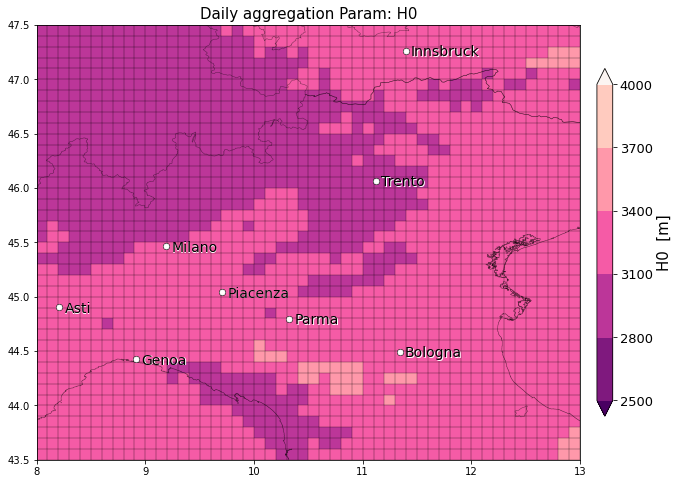

In [37]:
#MINIMUM of H0
sp_par = 'H0' 
sp_hour = 0
HF.HF_reanProxies_plot(sf_geo, sf_sp, x_lim, y_lim, df_sp_dayMin, sp_hour, sp_par, clonsel, clatsel, cnamesel, 
                       hourly=False)

pl.savefig(plt_fold + f"Events_Italy_2016-2018/{fold_out}/sphera_proxies/DailyMIN_{sp_par}_{sp_res}km.png",dpi=200,
           bbox_inches='tight')

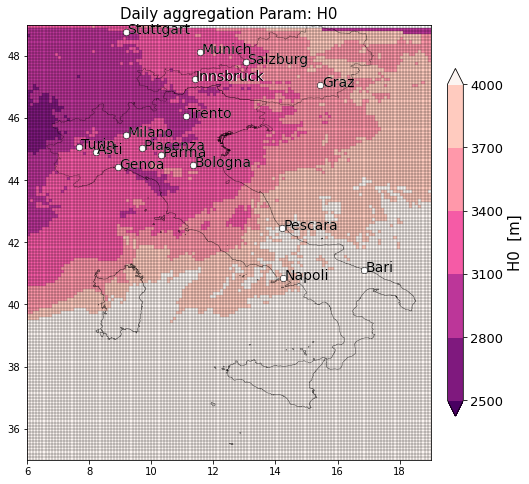

In [38]:
HF.HF_reanProxies_plot(sf_geo, sf_sp, x_lim_S, y_lim_S, df_sp_dayMin, sp_hour, sp_par, clonsel_S, clatsel_S, cnamesel_S, 
                       hourly=False)

pl.savefig(plt_fold + f"Events_Italy_2016-2018/{fold_out}/sphera_proxies/DailyMIN_{sp_par}_{sp_res}km_S.png",dpi=200,
           bbox_inches='tight')

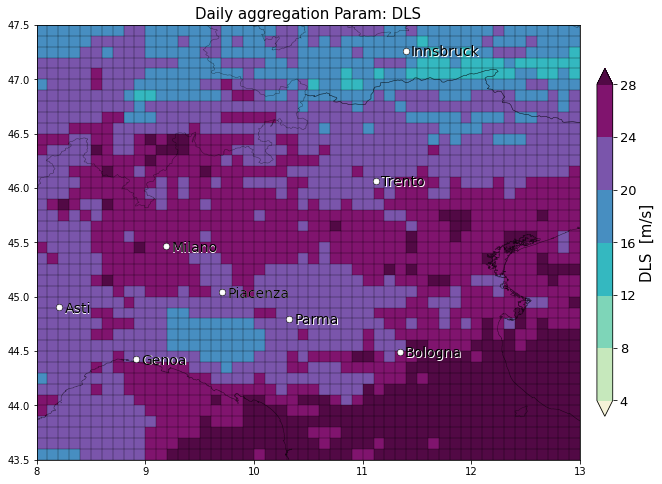

In [39]:
#MAXIMUM of DLS
sp_par = 'DLS' 
sp_hour = 0
HF.HF_reanProxies_plot(sf_geo, sf_sp, x_lim, y_lim, df_sp_dayMax, sp_hour, sp_par, clonsel, clatsel, cnamesel, 
                       hourly=False)

pl.savefig(plt_fold + f"Events_Italy_2016-2018/{fold_out}/sphera_proxies/DailyMAX_{sp_par}_{sp_res}km.png",dpi=200,
           bbox_inches='tight')

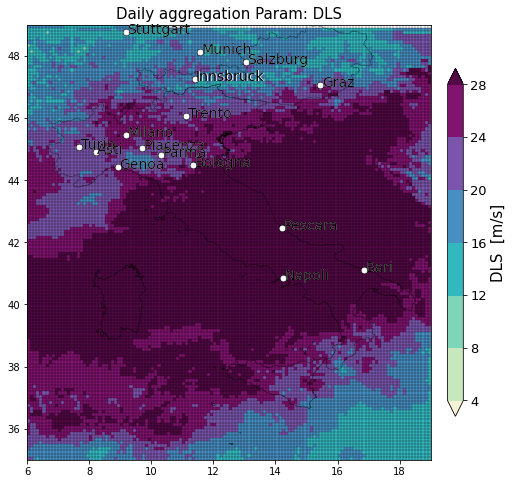

In [40]:
HF.HF_reanProxies_plot(sf_geo, sf_sp, x_lim_S, y_lim_S, df_sp_dayMax, sp_hour, sp_par, clonsel_S, clatsel_S, cnamesel_S, 
                       hourly=False)

pl.savefig(plt_fold + f"Events_Italy_2016-2018/{fold_out}/sphera_proxies/DailyMAX_{sp_par}_{sp_res}km_S.png",dpi=200,
           bbox_inches='tight')

##### - Plot parameters on a hourly basis: 

In [ ]:
#plot SPHERA parameter for selected hours of the day: >= hhmin and <=hhmax
hhmin = 7
hhmax = 20

for sp_hour in np.arange(hhmin, hhmax+1, 1):
 
    sp_par = 'LI'
    
    HF.HF_reanProxies_plot(sf_geo, sf_sp, x_lim, y_lim, df_sp, sp_hour, sp_par, clonsel, clatsel, cnamesel)
    pl.savefig(plt_fold + f"Events_Italy_2016-2018/{fold_out}/sphera_proxies/hourly/{sp_hour:02d}_{sp_par}_{sp_res}km.png", 
           dpi=100, bbox_inches='tight')
    plt.close()
     
    sp_par = 'Kindex'
    HF.HF_reanProxies_plot(sf_geo, sf_sp, x_lim, y_lim, df_sp, sp_hour, sp_par, clonsel, clatsel, cnamesel)
    pl.savefig(plt_fold + f"Events_Italy_2016-2018/{fold_out}/sphera_proxies/hourly/{sp_hour:02d}_{sp_par}_{sp_res}km_.png", 
           dpi=100, bbox_inches='tight')
    plt.close()
    
    sp_par = '%VV700'
    HF.HF_reanProxies_plot(sf_geo, sf_sp, x_lim, y_lim, df_sp, sp_hour, sp_par, clonsel, clatsel, cnamesel)
    pl.savefig(plt_fold + f"Events_Italy_2016-2018/{fold_out}/sphera_proxies/hourly/{sp_hour:02d}_{sp_par}_{sp_res}km_.png", 
           dpi=100, bbox_inches='tight')
    plt.close()
    
    sp_par = 'CAPE_MU'
    HF.HF_reanProxies_plot(sf_geo, sf_sp, x_lim, y_lim, df_sp, sp_hour, sp_par, clonsel, clatsel, cnamesel)
    pl.savefig(plt_fold + f"Events_Italy_2016-2018/{fold_out}/sphera_proxies/hourly/{sp_hour:02d}_{sp_par}_{sp_res}km_.png", 
           dpi=100, bbox_inches='tight')
    plt.close()
    
    sp_par = 'H0'
    HF.HF_reanProxies_plot(sf_geo, sf_sp, x_lim, y_lim, df_sp, sp_hour, sp_par, clonsel, clatsel, cnamesel)
    pl.savefig(plt_fold + f"Events_Italy_2016-2018/{fold_out}/sphera_proxies/hourly/{sp_hour:02d}_{sp_par}_{sp_res}km_.png", 
           dpi=100, bbox_inches='tight')
    plt.close()
   
    sp_par = 'DLS'
    HF.HF_reanProxies_plot(sf_geo, sf_sp, x_lim, y_lim, df_sp, sp_hour, sp_par, clonsel, clatsel, cnamesel)
    pl.savefig(plt_fold + f"Events_Italy_2016-2018/{fold_out}/sphera_proxies/hourly/{sp_hour:02d}_{sp_par}_{sp_res}km_.png", 
           dpi=100, bbox_inches='tight')
    plt.close()

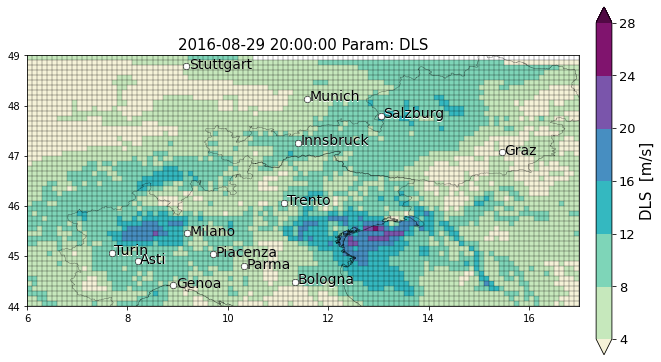

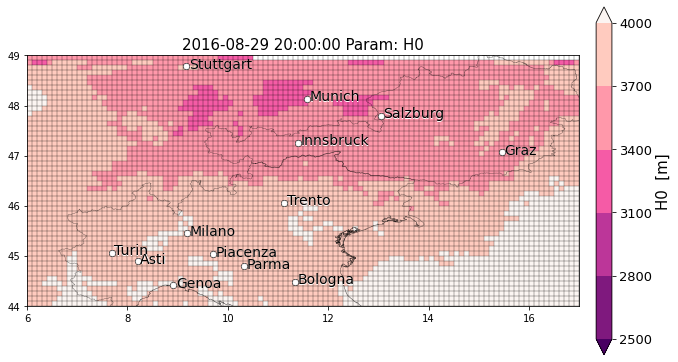

In [19]:
sp_hour=20

sp_par = 'DLS'
HF.HF_reanProxies_plot(sf_geo, sf_sp, x_lim, y_lim, df_sp, sp_hour, sp_par, clonsel, clatsel, cnamesel)
#pl.savefig(plt_fold + f"Events_Italy_2016-2018/{fold_out}/sphera_proxies/hourly/{sp_hour:02d}_{sp_par}_{sp_res}km_.png", 
#       dpi=100, bbox_inches='tight')
#plt.close()

sp_par = 'H0'
HF.HF_reanProxies_plot(sf_geo, sf_sp, x_lim, y_lim, df_sp, sp_hour, sp_par, clonsel, clatsel, cnamesel)
#pl.savefig(plt_fold + f"Events_Italy_2016-2018/{fold_out}/sphera_proxies/hourly/{sp_hour:02d}_{sp_par}_{sp_res}km_.png", 
#       dpi=100, bbox_inches='tight')
#plt.close()

- <span style="color:red"> MUST FINISH including AvvGeop500? </span>

- <span style="color:red"> MUST SOLVE the problem of re-uploading the external module when i modify some functions WITHOUT needing to restart the kernel (even multiple times!!!)

- <span style="color:black"> MUST also fix problems with hourly-based plottings: eswd/unipol reports should appear only in the hourly range considered, and also OT detections must be fixed plotting! (It seems that e.g. plotting for 14-15 and then 15-16 some OT detections are retained from the first plot to the second plot!! MUST CHECK AND FIX!) </span> --> **DONE**